In [1]:
import torch

from torchvision import models
from torchvision import transforms


import numpy as np
import matplotlib.pyplot as plt

In [2]:
target_classes = {
    543 : ["n03255030", "dumbbell"],
    968 : ["n07930864", "cup"],
    251 : ["n02110341", "dalmatian"],
    250 : ["n02110185", "Siberian_husky"],
    99  : ["n01855672", "goose"],
    9   : ["n01518878", "ostrich"]}

In [3]:
weights = models.VGG19_BN_Weights.IMAGENET1K_V1
net = models.vgg19_bn(weights=weights)

for param in net.parameters():
    param.requires_grad = False

net.cuda().eval()

print(weights.transforms())

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [4]:
IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)

total_epochs = 1000
lr = 1
momentum = 0
weight_decay = 0.1
l2_weight = 1


imgs = []
for target_class in target_classes:
    img = torch.zeros(size=(1, 3, 512, 512), requires_grad=True, device='cuda')
    optimizer = torch.optim.SGD([img], lr, momentum=momentum, weight_decay=weight_decay)

    for epoch in range(1, total_epochs+1):
        out = net(img)
        score = out[:, target_class] - l2_weight * torch.norm(img)
        loss = -score
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (epoch == 1) or (epoch % (total_epochs // 4) == 0):
            print(target_class, epoch, loss.item())

    img = img.cpu().detach()[0] + IMAGENET_MEAN
    imgs.append(transforms.ToPILImage()(img))
    print()

543 1 -0.6542763710021973
543 250 -150.4053192138672
543 500 -159.41787719726562
543 750 -165.5062255859375
543 1000 -165.0166473388672

968 1 -0.6899652481079102
968 250 -50.196449279785156
968 500 -58.893768310546875
968 750 -60.619972229003906
968 1000 -64.07842254638672

251 1 -0.06697443872690201
251 250 -72.67577362060547
251 500 -75.78443908691406
251 750 -83.6671371459961
251 1000 -86.74283599853516

250 1 0.04366382956504822
250 250 -48.37883377075195
250 500 -69.57432556152344
250 750 -71.12322235107422
250 1000 -85.50345611572266

99 1 0.2756752371788025
99 250 -103.67616271972656
99 500 -116.35195922851562
99 750 -120.83932495117188
99 1000 -122.13011932373047

9 1 0.3260694146156311
9 250 -113.589599609375
9 500 -128.93975830078125
9 750 -137.53009033203125
9 1000 -130.1838836669922



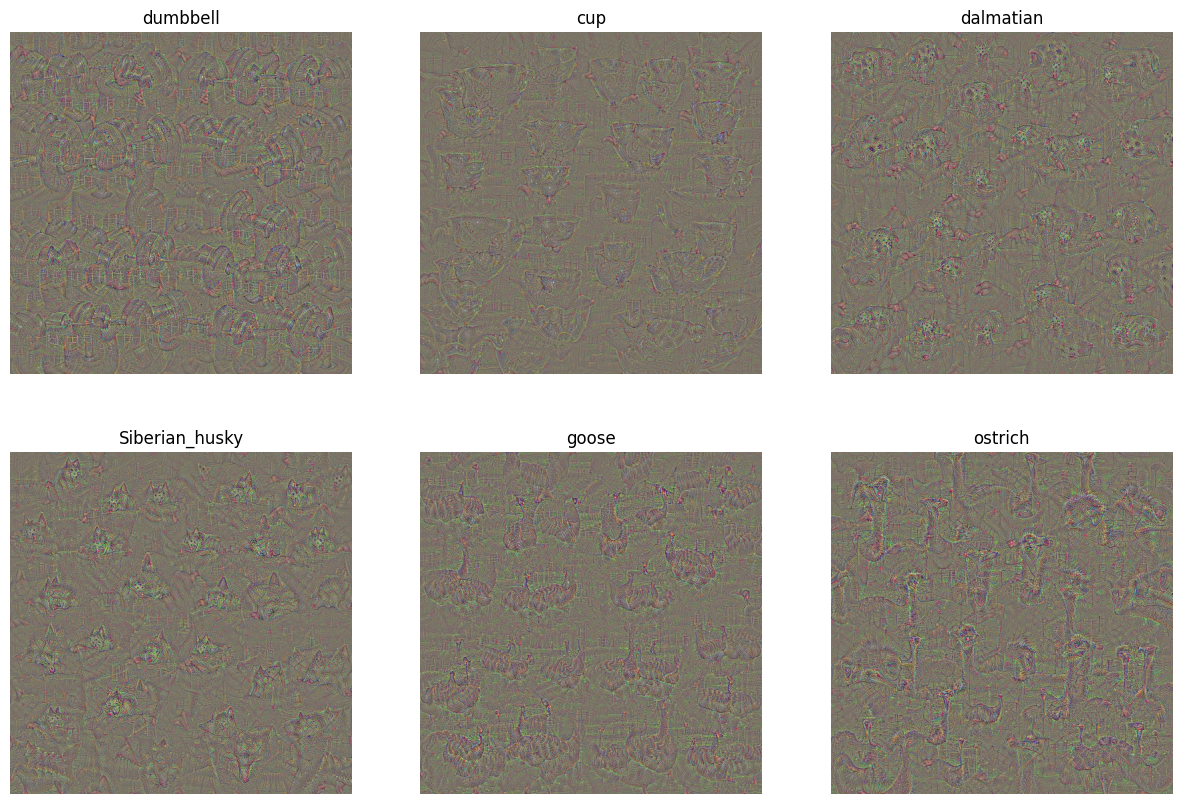

In [5]:
row, col = 2, 3

fig, axs = plt.subplots(row, col, figsize=(5 * col, 5 * row))

for i, target_class in enumerate(target_classes):
    axs[i//col][i%col].imshow(imgs[i])
    axs[i//col][i%col].axis('off')
    axs[i//col][i%col].set_title(target_classes[target_class][1])

plt.show()